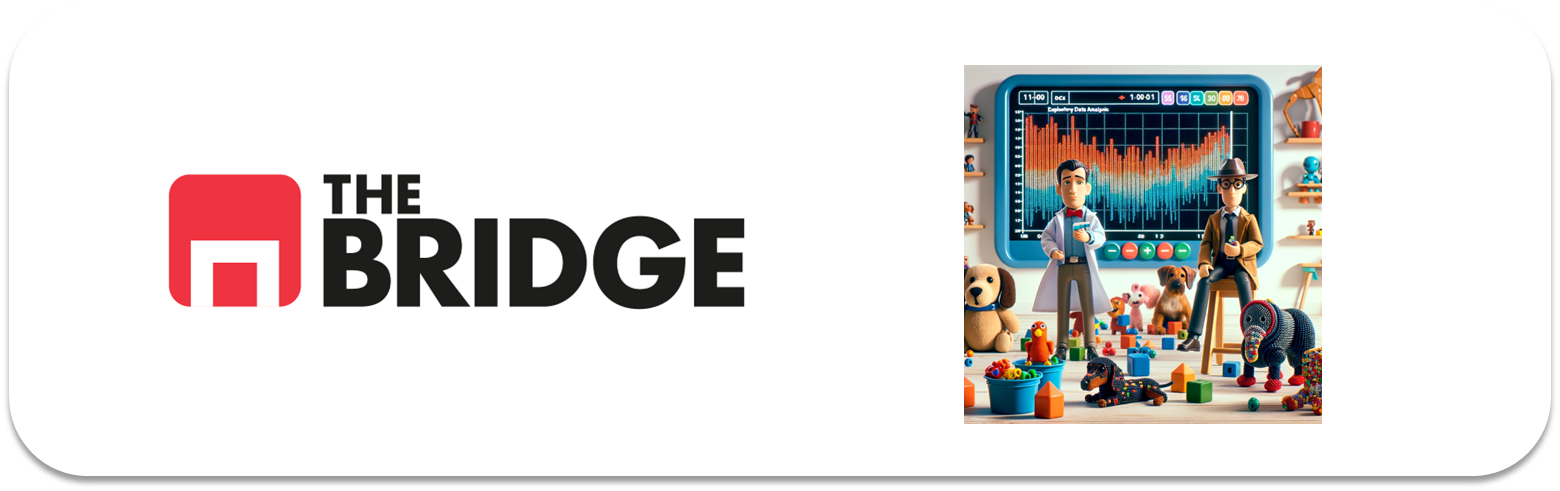

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [28]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [29]:
df_titanic = pd.read_csv("./titanic.csv")
df_titanic.head()



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [30]:
df_titanic.drop(columns=["deck", "survived", "pclass", "embarked"], inplace=True) #el inplace true lo que hace es modificar el df_titanic original si no solo imprimiria una copia (con las filas eliminadas) mientras el original permaneceria con las columnas que queriamos eliminar
df_titanic.head()


,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [31]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]
df_titanic.drop(columns=["parch", "sibsp"], inplace=True)
df_titanic.head()


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [32]:
mode_embark_town = df_titanic["embark_town"].mode()[0]
df_titanic["embark_town"].fillna(mode_embark_town, inplace=True)
print(df_titanic)


        sex   age     fare   class    who  adult_male  embark_town alive  \
0      male  22.0   7.2500   Third    man        True  Southampton    no   
1    female  38.0  71.2833   First  woman       False    Cherbourg   yes   
2    female  26.0   7.9250   Third  woman       False  Southampton   yes   
3    female  35.0  53.1000   First  woman       False  Southampton   yes   
4      male  35.0   8.0500   Third    man        True  Southampton    no   
..      ...   ...      ...     ...    ...         ...          ...   ...   
886    male  27.0  13.0000  Second    man        True  Southampton    no   
887  female  19.0  30.0000   First  woman       False  Southampton   yes   
888  female   NaN  23.4500   Third  woman       False  Southampton    no   
889    male  26.0  30.0000   First    man        True    Cherbourg   yes   
890    male  32.0   7.7500   Third    man        True   Queenstown    no   

     alone  family_members  
0    False               1  
1    False               1  


/var/folders/nc/0kdnp2f11kq7jg70skqglpch0000gn/T/ipykernel_15252/1906968014.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic["embark_town"].fillna(mode_embark_town, inplace=True)


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [33]:
mean_age = df_titanic["age"].mean()
df_titanic["age"].fillna(mean_age, inplace=True)
print(df_titanic)


        sex        age     fare   class    who  adult_male  embark_town alive  \
0      male  22.000000   7.2500   Third    man        True  Southampton    no   
1    female  38.000000  71.2833   First  woman       False    Cherbourg   yes   
2    female  26.000000   7.9250   Third  woman       False  Southampton   yes   
3    female  35.000000  53.1000   First  woman       False  Southampton   yes   
4      male  35.000000   8.0500   Third    man        True  Southampton    no   
..      ...        ...      ...     ...    ...         ...          ...   ...   
886    male  27.000000  13.0000  Second    man        True  Southampton    no   
887  female  19.000000  30.0000   First  woman       False  Southampton   yes   
888  female  29.699118  23.4500   Third  woman       False  Southampton    no   
889    male  26.000000  30.0000   First    man        True    Cherbourg   yes   
890    male  32.000000   7.7500   Third    man        True   Queenstown    no   

     alone  family_members 

/var/folders/nc/0kdnp2f11kq7jg70skqglpch0000gn/T/ipykernel_15252/1056020740.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic["age"].fillna(mean_age, inplace=True)


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

alive    no  yes
sex             
female   81  233
male    468  109
alive         no       yes
sex                       
female  0.257962  0.742038
male    0.811092  0.188908


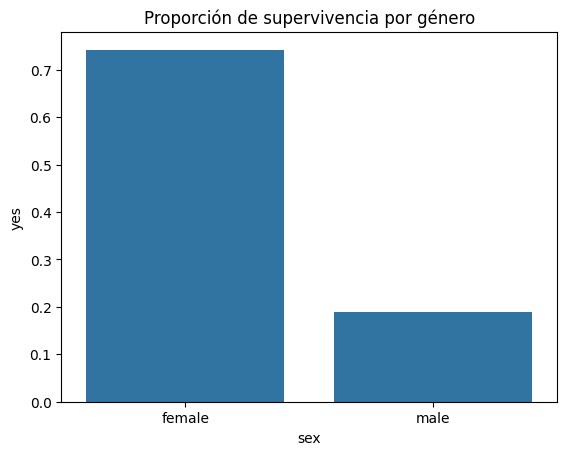

In [34]:
survival_by_gender = df_titanic.groupby("sex")["alive"].value_counts().unstack()
print(survival_by_gender)

survival_relative = survival_by_gender.div(survival_by_gender.sum(axis=1), axis=0)
print(survival_relative)

sns.barplot(data=survival_relative.reset_index(), x="sex", y="yes")
plt.title("Proporción de supervivencia por género")
plt.show()


alive    no  yes
class           
First    80  136
Second   97   87
Third   372  119
alive         no       yes
class                     
First   0.370370  0.629630
Second  0.527174  0.472826
Third   0.757637  0.242363


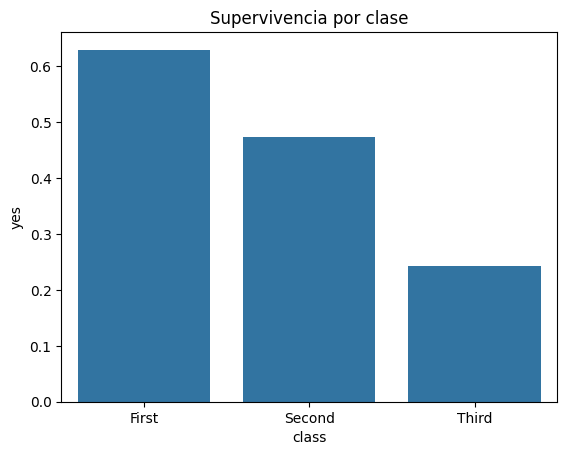

In [35]:
class_survival = df_titanic.groupby("class")["alive"].value_counts().unstack()
print(class_survival)

class_survival_relative = class_survival.div(class_survival.sum(axis=1), axis=0)
print(class_survival_relative)

sns.barplot(data=class_survival_relative.reset_index(), x="class", y="yes", order=["First", "Second", "Third"])
plt.title("Supervivencia por clase")
plt.show()


alive         no  yes
embark_town          
Cherbourg     75   93
Queenstown    47   30
Southampton  427  219
alive              no       yes
embark_town                    
Cherbourg    0.446429  0.553571
Queenstown   0.610390  0.389610
Southampton  0.660991  0.339009


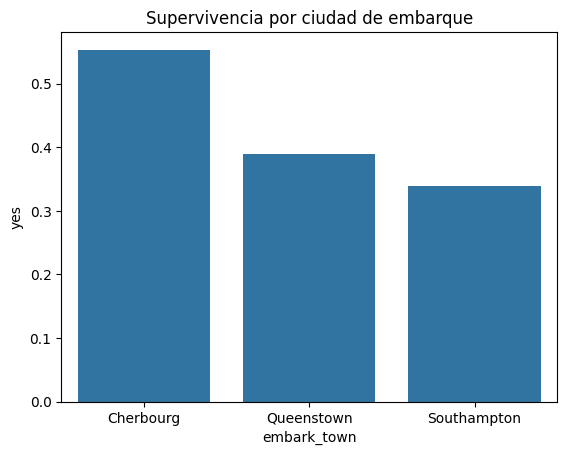

In [36]:
embark_survival = df_titanic.groupby("embark_town")["alive"].value_counts().unstack()
print(embark_survival)

embark_survival_relative = embark_survival.div(embark_survival.sum(axis=1), axis=0)
print(embark_survival_relative)

sns.barplot(data=embark_survival_relative.reset_index(), x="embark_town", y="yes")
plt.title("Supervivencia por ciudad de embarque")
plt.show()


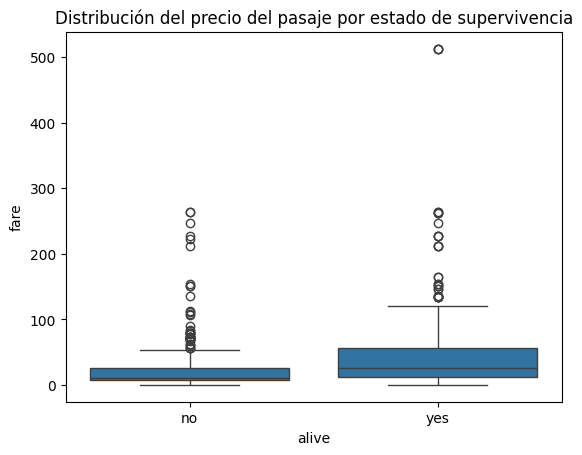

In [37]:
sns.boxplot(data=df_titanic, x="alive", y="fare")
plt.title("Distribución del precio del pasaje por estado de supervivencia")
plt.show()


In [38]:
no_fare = df_titanic[df_titanic["fare"] == 0]
print(f"Pasajeros que no pagaron: {len(no_fare)}")
print(no_fare)

max_fare = df_titanic["fare"].max()
print(f"La tarifa más alta pagada fue: {max_fare}")



Pasajeros que no pagaron: 15
      sex        age  fare   class  who  adult_male  embark_town alive  alone  \
179  male  36.000000   0.0   Third  man        True  Southampton    no   True   
263  male  40.000000   0.0   First  man        True  Southampton    no   True   
271  male  25.000000   0.0   Third  man        True  Southampton   yes   True   
277  male  29.699118   0.0  Second  man        True  Southampton    no   True   
302  male  19.000000   0.0   Third  man        True  Southampton    no   True   
413  male  29.699118   0.0  Second  man        True  Southampton    no   True   
466  male  29.699118   0.0  Second  man        True  Southampton    no   True   
481  male  29.699118   0.0  Second  man        True  Southampton    no   True   
597  male  49.000000   0.0   Third  man        True  Southampton    no   True   
633  male  29.699118   0.0   First  man        True  Southampton    no   True   
674  male  29.699118   0.0  Second  man        True  Southampton    no   True   

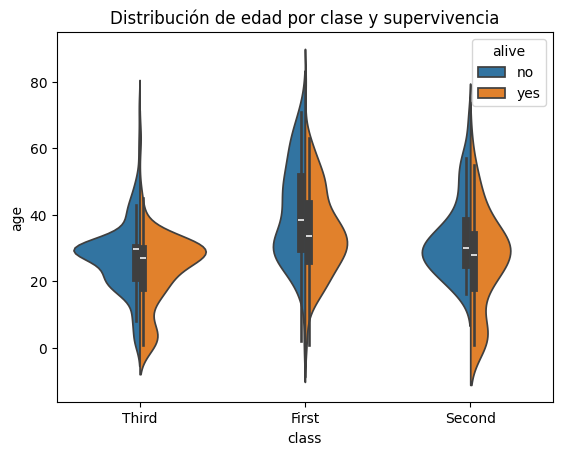

In [39]:
sns.violinplot(data=df_titanic, x="class", y="age", hue="alive", split=True)
plt.title("Distribución de edad por clase y supervivencia")
plt.show()


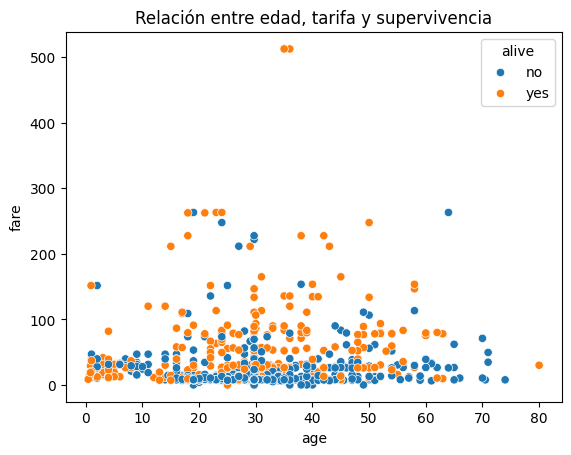

In [40]:
sns.scatterplot(data=df_titanic, x="age", y="fare", hue="alive")
plt.title("Relación entre edad, tarifa y supervivencia")
plt.show()


## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset de viajes
df_viajes = pd.read_csv("./dataset_viajes_jun23.csv")

# Mostrar los primeros registros para familiarizarnos con los datos
print(df_viajes.head())
print(df_viajes.info())

# Verificar si hay valores nulos
print("Porcentaje de valores nulos por columna:")
print(df_viajes.isnull().mean() * 100)


   aircompany      origen      destino  distancia        avion  con_escala  \
0      Airnar       París      Ginebra        411   Boeing 737       False   
1        FlyQ        Bali         Roma      12738   Boeing 737        True   
2    TabarAir     Ginebra  Los Angeles       9103  Airbus A380       False   
3  MoldaviAir       París   Cincinnati       6370   Boeing 737       False   
4    TabarAir  Cincinnati         Roma       7480   Boeing 747       False   

      consumo_kg  duracion   ingresos        id_vuelo    mes  
0    1028.691900        51   14232.65  Air_PaGi_10737  Jun23  
1   33479.132544      1167  468527.19  Fly_BaRo_10737  Jun23  
2  109439.907200       626  584789.19  Tab_GiLo_11380  Jun23  
3   17027.010000       503  233342.51  Mol_PaCi_10737  Jun23  
4   86115.744000       518  438535.07  Tab_CiRo_10747  Jun23  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  --

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

           ingresos     distancia     consumo_kg
count  6.000000e+02    600.000000     600.000000
mean   4.187689e+05   8071.003333   68240.520508
std    3.182858e+05   5550.244086   67441.849592
min    1.179785e+04    344.000000     835.920000
25%    1.627668e+05   3073.000000   15733.520400
50%    3.754817e+05   6877.000000   36033.998000
75%    6.188420e+05  12553.000000  111717.652800
max    1.295516e+06  20029.000000  264876.314560


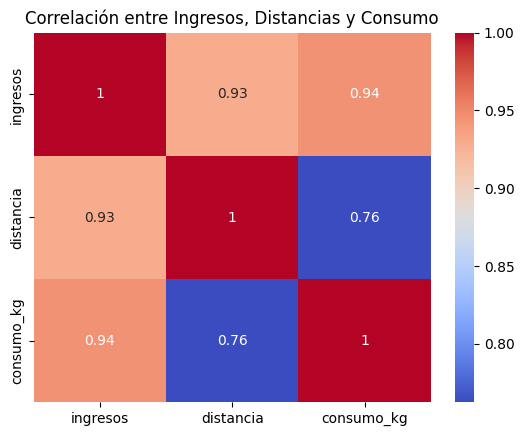

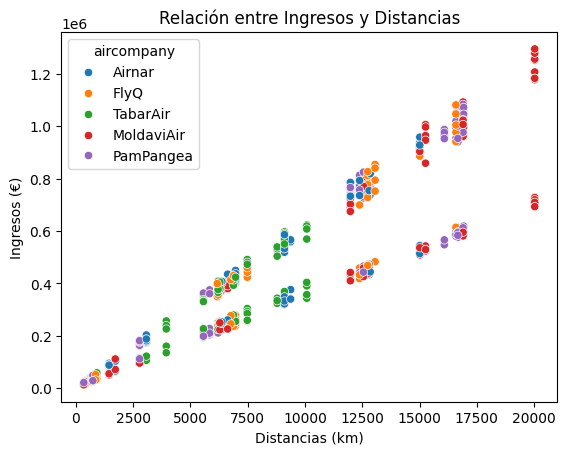

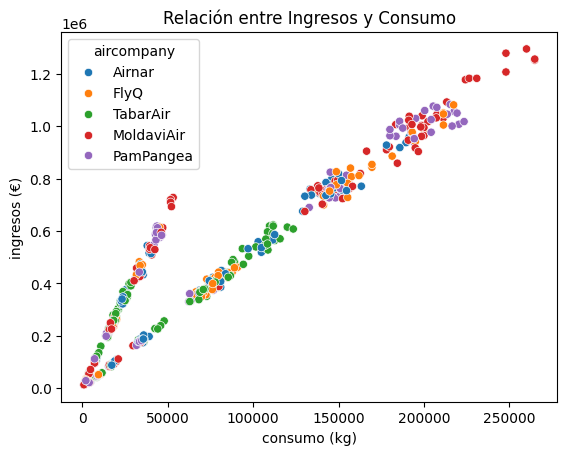

In [52]:
# Resumen de estadísticas descriptivas
print(df_viajes[["ingresos", "distancia", "consumo_kg"]].describe())

# Matriz de correlación
sns.heatmap(df_viajes[["ingresos", "distancia", "consumo_kg"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlación entre Ingresos, Distancias y Consumo")
plt.show()

# Relación entre ingresos y distancias
sns.scatterplot(data=df_viajes, x="distancia", y="ingresos", hue="aircompany", palette="tab10")
plt.title("Relación entre Ingresos y Distancias")
plt.xlabel("Distancias (km)")
plt.ylabel("Ingresos (€)")
plt.show()

# Relación entre ingresos y consumo
sns.scatterplot(data=df_viajes, x="consumo_kg", y="ingresos", hue="aircompany", palette="tab10")
plt.title("Relación entre Ingresos y Consumo")
plt.xlabel("consumo (kg)")
plt.ylabel("ingresos (€)")
plt.show()


### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

cat_vuelo
Ultra Largo    454
Medio           85
Corto           32
Largo           29
Name: count, dtype: int64


/var/folders/nc/0kdnp2f11kq7jg70skqglpch0000gn/T/ipykernel_15252/1362862159.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_viajes, x="cat_vuelo", y="ingresos", palette="pastel")


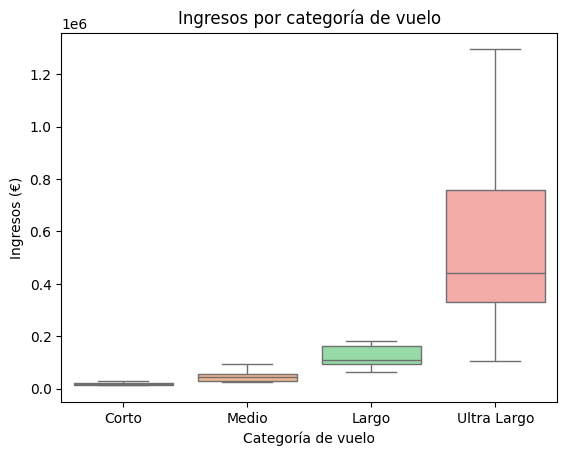

/var/folders/nc/0kdnp2f11kq7jg70skqglpch0000gn/T/ipykernel_15252/1362862159.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_viajes, x="cat_vuelo", y="consumo_kg", palette="muted")


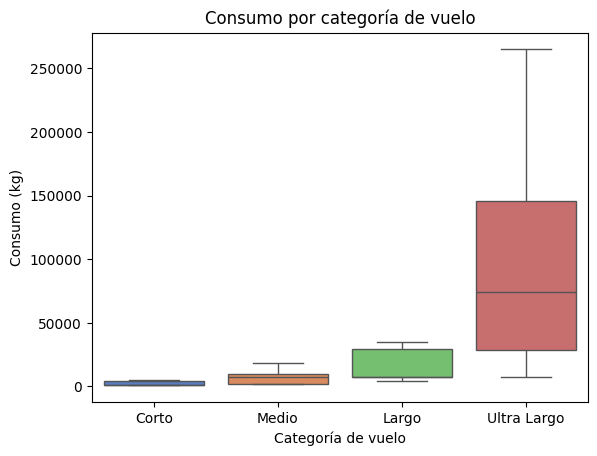

In [54]:
# Crear rangos para categorizar distancias
bins = [0, 500, 1500, 3000, df_viajes["distancia"].max()]
labels = ["Corto", "Medio", "Largo", "Ultra Largo"]

df_viajes["cat_vuelo"] = pd.cut(df_viajes["distancia"], bins=bins, labels=labels)

# Verificar la nueva columna
print(df_viajes["cat_vuelo"].value_counts())

# Relación entre las categorías de vuelo y los ingresos/consumo
sns.boxplot(data=df_viajes, x="cat_vuelo", y="ingresos", palette="pastel")
plt.title("Ingresos por categoría de vuelo")
plt.xlabel("Categoría de vuelo")
plt.ylabel("Ingresos (€)")
plt.show()

sns.boxplot(data=df_viajes, x="cat_vuelo", y="consumo_kg", palette="muted")
plt.title("Consumo por categoría de vuelo")
plt.xlabel("Categoría de vuelo")
plt.ylabel("Consumo (kg)")
plt.show()


### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.